#  Shinkansen Travel Experience

**PROBLEM STATEMENT**

This is the problem of a Shinkansen (Bullet-Trains) of Japan. They aim to determine the relative importance of each parameter with regards to their contribution to the passenger travel experience. Provided is a random sample of individuals who travelled using their train. The on-time performance of the trains along with the passenger’s information is published in the CSV file named ‘Traveldata_train’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report CSV labelled ‘Surveydata_train’.

In the survey, a passenger was explicitly asked whether they were delighted with their overall travel experience and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’. 

The objective of this exercise is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing Travel data and Survey data of passengers. Both the test data and the train data are collected at the same time and belongs to the same company.

**Objective:**

- The goal of the problem is to predict whether a passenger was delighted considering his/her overall travel experience of traveling in Shinkansen (Bullet Train). For each passenger id in the test set,  predict the “Overall_Experience” level.


**Data set Details**

The problem consists of 2 separate datasets: Travel data & Survey data. The Travel data has information related to passengers and the performance of the Train in which they traveled. The survey data is the aggregated data of surveys collected post-service experience. You are expected to treat both the datasets as raw data and perform any necessary cleaning/validation steps as required.

**Import the necessary libraries**

In [1]:
# Libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for scaling the data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Library to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries for Model Building
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

import catboost as catboost
from catboost import CatBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

import lightgbm as lightgbm
from lightgbm import LGBMClassifier

import xgboost as xgboost
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Libraries for evaluation metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

**Read the data and EDA**

In [2]:
import os
os.getcwd()

'C:\\Users\\User\\Desktop\\GL\\Hackathon-Shinkansen'

In [3]:
survey_df = pd.read_csv("Surveydata_train.csv")
survey_df_test = pd.read_csv("Surveydata_test.csv")

In [4]:
travel_df = pd.read_csv("Traveldata_train.csv")
travel_df_test = pd.read_csv("Traveldata_test.csv")

In [5]:
# Has the Target Variable
survey_df.shape,travel_df.shape

((94379, 17), (94379, 9))

In [6]:
survey_df_test.shape,travel_df_test.shape

((35602, 16), (35602, 9))

In [7]:
display(survey_df.head())
display(survey_df_test.head())

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [8]:
display(survey_df.info())
display(survey_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_location        94349 non-null  object
 7   Onboardwifi_service      94349 non-null  object
 8   Onboard_entertainment    94361 non-null  object
 9   Online_support           94288 non-null  object
 10  Onlinebooking_Ease       94306 non-null  object
 11  Onboard_service          86778 non-null  object
 12  Leg_room                 94289 non-null  object
 13  Baggage_handling         94237 non-null  object
 14  Checkin_service          94302 non-nul

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_time_convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_location        35590 non-null  object
 6   Onboardwifi_service      35590 non-null  object
 7   Onboard_entertainment    35594 non-null  object
 8   Online_support           35576 non-null  object
 9   Onlinebooking_Ease       35584 non-null  object
 10  Onboard_service          32730 non-null  object
 11  Leg_room                 35577 non-null  object
 12  Baggage_handling         35562 non-null  object
 13  Checkin_service          35580 non-null  object
 14  Cleanliness              35600 non-nul

None

In [9]:
display(travel_df.head())
display(travel_df_test.head())

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [10]:
display(travel_df.info())
display(travel_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      35602 non-null  int64  
 1   Gender                  35572 non-null  object 
 2   CustomerType            32219 non-null  object 
 3   Age                     35591 non-null  float64
 4   TypeTravel              32154 non-null  object 
 5   Travel_Class            35602 non-null  object 
 6   Travel_Distance         35602 non-null  int64  
 7   DepartureDelay_in_Mins  35573 non-null  float64
 8   ArrivalDelay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


None

In [11]:
#merging the two datasets

df = pd.merge(survey_df, travel_df, on= 'ID')
df_test = pd.merge(survey_df_test, travel_df_test, on= 'ID')

In [12]:
display(df.head())
display(df_test.head())

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,excellent,poor,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,excellent,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,excellent,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [13]:
display("Train", df.shape)
display("Test", df_test.shape)

'Train'

(94379, 25)

'Test'

(35602, 24)

In [14]:
print(df.Overall_Experience.value_counts())
df.Overall_Experience.value_counts(normalize=True) 

1    51593
0    42786
Name: Overall_Experience, dtype: int64


1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

In [1250]:
display(df.describe(include = 'all'))

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,9.437900e+04,94379.000000,94318,94379,85449,85638,94349,94349,94361,94288,...,94373,94373,94302,85428,94346.000000,85153,94379,94379.000000,94322.000000,94022.000000
unique,NaN,NaN,6,2,6,6,6,6,6,6,...,6,6,2,2,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,acceptable,Green Car,good,acceptable,manageable,good,good,good,...,good,good,Female,Loyal Customer,NaN,Business travel,Eco,NaN,NaN,NaN
freq,NaN,NaN,21158,47435,19574,18468,24173,22835,30446,30016,...,35427,25533,47815,69823,NaN,58617,49342,NaN,NaN,NaN
mean,9.884719e+07,0.546658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39.419647,NaN,NaN,1978.888185,14.647092,15.005222
std,2.724501e+04,0.497821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15.116632,NaN,NaN,1027.961019,38.138781,38.439409
min,9.880000e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000
25%,9.882360e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,1359.000000,0.000000,0.000000
50%,9.884719e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,1923.000000,0.000000,0.000000
75%,9.887078e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,51.000000,NaN,NaN,2538.000000,12.000000,13.000000


In [1251]:
display("TRAIN DATASET",df.nunique())
display("TEST DATASET",df_test.nunique())

'TRAIN DATASET'

ID                         94379
Overall_Experience             2
Seat_comfort                   6
Seat_Class                     2
Arrival_time_convenient        6
Catering                       6
Platform_location              6
Onboardwifi_service            6
Onboard_entertainment          6
Online_support                 6
Onlinebooking_Ease             6
Onboard_service                6
Leg_room                       6
Baggage_handling               5
Checkin_service                6
Cleanliness                    6
Online_boarding                6
Gender                         2
CustomerType                   2
Age                           75
TypeTravel                     2
Travel_Class                   2
Travel_Distance             5210
DepartureDelay_in_Mins       437
ArrivalDelay_in_Mins         434
dtype: int64

'TEST DATASET'

ID                         35602
Seat_comfort                   6
Seat_Class                     2
Arrival_time_convenient        6
Catering                       6
Platform_location              5
Onboardwifi_service            6
Onboard_entertainment          6
Online_support                 5
Onlinebooking_Ease             6
Onboard_service                5
Leg_room                       6
Baggage_handling               5
Checkin_service                5
Cleanliness                    5
Online_boarding                6
Gender                         2
CustomerType                   2
Age                           75
TypeTravel                     2
Travel_Class                   2
Travel_Distance             4644
DepartureDelay_in_Mins       350
ArrivalDelay_in_Mins         355
dtype: int64

In [1252]:
display("TRAIN DATASET",df.isnull().sum())
display("TEST DATASET",df_test.isnull().sum())

'TRAIN DATASET'

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
dtype: int64

'TEST DATASET'

ID                            0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
Gender                       30
CustomerType               3383
Age                          11
TypeTravel                 3448
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       29
ArrivalDelay_in_Mins        123
dtype: int64

In [1253]:
display("TRAIN DATASET",df.isnull().sum() / df.shape[0] * 100)
display("TEST DATASET",df_test.isnull().sum() / df_test.shape[0] * 100)

'TRAIN DATASET'

ID                         0.000000
Overall_Experience         0.000000
Seat_comfort               0.064633
Seat_Class                 0.000000
Arrival_time_convenient    9.461851
Catering                   9.261594
Platform_location          0.031787
Onboardwifi_service        0.031787
Onboard_entertainment      0.019072
Online_support             0.096420
Onlinebooking_Ease         0.077348
Onboard_service            8.053698
Leg_room                   0.095360
Baggage_handling           0.150457
Checkin_service            0.081586
Cleanliness                0.006357
Online_boarding            0.006357
Gender                     0.081586
CustomerType               9.484101
Age                        0.034965
TypeTravel                 9.775480
Travel_Class               0.000000
Travel_Distance            0.000000
DepartureDelay_in_Mins     0.060395
ArrivalDelay_in_Mins       0.378262
dtype: float64

'TEST DATASET'

ID                         0.000000
Seat_comfort               0.061794
Seat_Class                 0.000000
Arrival_time_convenient    9.339363
Catering                   9.429246
Platform_location          0.033706
Onboardwifi_service        0.033706
Onboard_entertainment      0.022471
Online_support             0.073030
Onlinebooking_Ease         0.050559
Onboard_service            8.066963
Leg_room                   0.070221
Baggage_handling           0.112353
Checkin_service            0.061794
Cleanliness                0.005618
Online_boarding            0.005618
Gender                     0.084265
CustomerType               9.502275
Age                        0.030897
TypeTravel                 9.684849
Travel_Class               0.000000
Travel_Distance            0.000000
DepartureDelay_in_Mins     0.081456
ArrivalDelay_in_Mins       0.345486
dtype: float64

In [1254]:
display("TRAIN",df.Seat_comfort.value_counts())
display(df.Seat_comfort.value_counts(normalize=True)) 
#display(df.groupby(['Seat_comfort', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Seat_comfort.value_counts())
display(df_test.Seat_comfort.value_counts(normalize=True))  

'TRAIN'

acceptable          21158
need improvement    20946
good                20595
poor                15185
excellent           12971
extremely poor       3463
Name: Seat_comfort, dtype: int64

acceptable          0.224326
need improvement    0.222079
good                0.218357
poor                0.160998
excellent           0.137524
extremely poor      0.036716
Name: Seat_comfort, dtype: float64

'TEST'

acceptable          8003
need improvement    7831
good                7808
poor                5755
excellent           4854
extremely poor      1329
Name: Seat_comfort, dtype: int64

acceptable          0.224930
need improvement    0.220096
good                0.219449
poor                0.161748
excellent           0.136425
extremely poor      0.037352
Name: Seat_comfort, dtype: float64

In [1255]:
display("TRAIN",df.Seat_Class.value_counts())
display(df.Seat_Class.value_counts(normalize=True)) 
#display(df.groupby(['Seat_Class', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Seat_Class.value_counts())
display(df_test.Seat_Class.value_counts(normalize=True))  

'TRAIN'

Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64

Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64

'TEST'

Ordinary     17860
Green Car    17742
Name: Seat_Class, dtype: int64

Ordinary     0.501657
Green Car    0.498343
Name: Seat_Class, dtype: float64

In [1256]:
display("TRAIN",df.Catering.value_counts())
display(df.Catering.value_counts(normalize=True)) 
#display(df.groupby(['Catering', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Catering.value_counts())
display(df_test.Catering.value_counts(normalize=True)) 

'TRAIN'

acceptable          18468
need improvement    17978
good                17969
poor                13858
excellent           13455
extremely poor       3910
Name: Catering, dtype: int64

acceptable          0.215652
need improvement    0.209930
good                0.209825
poor                0.161821
excellent           0.157115
extremely poor      0.045657
Name: Catering, dtype: float64

'TEST'

acceptable          7133
need improvement    6701
good                6701
poor                5178
excellent           5025
extremely poor      1507
Name: Catering, dtype: int64

acceptable          0.221213
need improvement    0.207815
good                0.207815
poor                0.160583
excellent           0.155838
extremely poor      0.046736
Name: Catering, dtype: float64

In [1257]:
display("TRAIN",df.Arrival_time_convenient.value_counts())
display(df.Arrival_time_convenient.value_counts(normalize=True)) 
#display(df.groupby(['Arrival_time_convenient', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Arrival_time_convenient.value_counts())
display(df_test.Arrival_time_convenient.value_counts(normalize=True)) 

'TRAIN'

good                19574
excellent           17684
acceptable          15177
need improvement    14990
poor                13692
extremely poor       4332
Name: Arrival_time_convenient, dtype: int64

good                0.229072
excellent           0.206954
acceptable          0.177615
need improvement    0.175426
poor                0.160236
extremely poor      0.050697
Name: Arrival_time_convenient, dtype: float64

'TEST'

good                7361
excellent           6589
acceptable          5844
need improvement    5684
poor                5131
extremely poor      1668
Name: Arrival_time_convenient, dtype: int64

good                0.228057
excellent           0.204139
acceptable          0.181058
need improvement    0.176101
poor                0.158968
extremely poor      0.051678
Name: Arrival_time_convenient, dtype: float64

In [1258]:
display("TRAIN",df.Platform_location.value_counts())
display(df.Platform_location.value_counts(normalize=True)) 
#display(df.groupby(['Platform_location', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Platform_location.value_counts())
display(df_test.Platform_location.value_counts(normalize=True)) 

'TRAIN'

manageable           24173
Convinient           21912
need improvement     17832
Inconvinient         16449
very convinient      13981
very inconvinient        2
Name: Platform_location, dtype: int64

manageable           0.256208
Convinient           0.232244
need improvement     0.189000
Inconvinient         0.174342
very convinient      0.148184
very inconvinient    0.000021
Name: Platform_location, dtype: float64

'TEST'

manageable          9364
Convinient          8178
need improvement    6703
Inconvinient        6134
very convinient     5211
Name: Platform_location, dtype: int64

manageable          0.263108
Convinient          0.229784
need improvement    0.188339
Inconvinient        0.172352
very convinient     0.146418
Name: Platform_location, dtype: float64

In [1259]:
display("TRAIN",df.Onboardwifi_service.value_counts())
display(df.Onboardwifi_service.value_counts(normalize=True)) 
#display(df.groupby(['Onboardwifi_service', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Onboardwifi_service.value_counts())
display(df_test.Onboardwifi_service.value_counts(normalize=True))  

'TRAIN'

good                22835
excellent           20968
acceptable          20118
need improvement    19596
poor                10741
extremely poor         91
Name: Onboardwifi_service, dtype: int64

good                0.242027
excellent           0.222239
acceptable          0.213230
need improvement    0.207697
poor                0.113843
extremely poor      0.000965
Name: Onboardwifi_service, dtype: float64

'TEST'

good                8743
excellent           7875
acceptable          7495
need improvement    7456
poor                3980
extremely poor        41
Name: Onboardwifi_service, dtype: int64

good                0.245659
excellent           0.221270
acceptable          0.210593
need improvement    0.209497
poor                0.111829
extremely poor      0.001152
Name: Onboardwifi_service, dtype: float64

In [1260]:
display("TRAIN",df.Onboard_entertainment.value_counts())
display(df.Onboard_entertainment.value_counts(normalize=True)) 
#display(df.groupby(['Onboard_entertainment', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Onboard_entertainment.value_counts())
display(df_test.Onboard_entertainment.value_counts(normalize=True)) 

'TRAIN'

good                30446
excellent           21644
acceptable          17560
need improvement    13926
poor                 8641
extremely poor       2144
Name: Onboard_entertainment, dtype: int64

good                0.322654
excellent           0.229374
acceptable          0.186094
need improvement    0.147582
poor                0.091574
extremely poor      0.022721
Name: Onboard_entertainment, dtype: float64

'TEST'

good                11436
excellent            8204
acceptable           6675
need improvement     5279
poor                 3167
extremely poor        833
Name: Onboard_entertainment, dtype: int64

good                0.321290
excellent           0.230488
acceptable          0.187532
need improvement    0.148312
poor                0.088976
extremely poor      0.023403
Name: Onboard_entertainment, dtype: float64

In [1261]:
display("TRAIN",df.Online_support.value_counts())
display(df.Online_support.value_counts(normalize=True)) 
#display(df.groupby(['Online_support', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Online_support.value_counts())
display(df_test.Online_support.value_counts(normalize=True))  

'TRAIN'

good                30016
excellent           25894
acceptable          15702
need improvement    12508
poor                10167
extremely poor          1
Name: Online_support, dtype: int64

good                0.318344
excellent           0.274627
acceptable          0.166532
need improvement    0.132657
poor                0.107829
extremely poor      0.000011
Name: Online_support, dtype: float64

'TEST'

good                11487
excellent            9665
acceptable           5902
need improvement     4755
poor                 3767
Name: Online_support, dtype: int64

good                0.322886
excellent           0.271672
acceptable          0.165898
need improvement    0.133658
poor                0.105886
Name: Online_support, dtype: float64

In [1262]:
display("TRAIN",df.Onlinebooking_Ease.value_counts())
display(df.Onlinebooking_Ease.value_counts(normalize=True)) 
#display(df.groupby(['Onlinebooking_Ease', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Onlinebooking_Ease.value_counts())
display(df_test.Onlinebooking_Ease.value_counts(normalize=True)) 

'TRAIN'

good                28909
excellent           24744
acceptable          16390
need improvement    14479
poor                 9768
extremely poor         16
Name: Onlinebooking_Ease, dtype: int64

good                0.306545
excellent           0.262380
acceptable          0.173796
need improvement    0.153532
poor                0.103578
extremely poor      0.000170
Name: Onlinebooking_Ease, dtype: float64

'TEST'

good                11025
excellent            9380
acceptable           6029
need improvement     5474
poor                 3674
extremely poor          2
Name: Onlinebooking_Ease, dtype: int64

good                0.309830
excellent           0.263602
acceptable          0.169430
need improvement    0.153833
poor                0.103249
extremely poor      0.000056
Name: Onlinebooking_Ease, dtype: float64

In [1263]:
display("TRAIN",df.Onboard_service.value_counts())
display(df.Onboard_service.value_counts(normalize=True)) 
#display(df.groupby(['Onboard_service', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Onboard_service.value_counts())
display(df_test.Onboard_service.value_counts(normalize=True)) 

'TRAIN'

good                27265
excellent           21272
acceptable          18071
need improvement    11390
poor                 8776
extremely poor          4
Name: Onboard_service, dtype: int64

good                0.314193
excellent           0.245131
acceptable          0.208244
need improvement    0.131254
poor                0.101132
extremely poor      0.000046
Name: Onboard_service, dtype: float64

'TEST'

good                10222
excellent            7941
acceptable           6770
need improvement     4385
poor                 3412
Name: Onboard_service, dtype: int64

good                0.312313
excellent           0.242621
acceptable          0.206844
need improvement    0.133975
poor                0.104247
Name: Onboard_service, dtype: float64

In [1264]:
display("TRAIN",df.Leg_room.value_counts())
display(df.Leg_room.value_counts(normalize=True)) 
#display(df.groupby(['Leg_room', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Leg_room.value_counts())
display(df_test.Leg_room.value_counts(normalize=True)) 

'TRAIN'

good                28870
excellent           24832
acceptable          16384
need improvement    15753
poor                 8110
extremely poor        340
Name: Leg_room, dtype: int64

good                0.306186
excellent           0.263361
acceptable          0.173764
need improvement    0.167071
poor                0.086012
extremely poor      0.003606
Name: Leg_room, dtype: float64

'TEST'

good                10842
excellent            9536
acceptable           6079
need improvement     5992
poor                 3025
extremely poor        103
Name: Leg_room, dtype: int64

good                0.304747
excellent           0.268038
acceptable          0.170869
need improvement    0.168423
poor                0.085027
extremely poor      0.002895
Name: Leg_room, dtype: float64

In [1265]:
display("TRAIN",df.Baggage_handling.value_counts())
display(df.Baggage_handling.value_counts(normalize=True)) 
#display(df.groupby(['Baggage_handling', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Baggage_handling.value_counts())
display(df_test.Baggage_handling.value_counts(normalize=True)) 

'TRAIN'

good                34944
excellent           26003
acceptable          17767
need improvement     9759
poor                 5764
Name: Baggage_handling, dtype: int64

good                0.370810
excellent           0.275932
acceptable          0.188535
need improvement    0.103558
poor                0.061165
Name: Baggage_handling, dtype: float64

'TEST'

good                13291
excellent            9729
acceptable           6683
need improvement     3659
poor                 2200
Name: Baggage_handling, dtype: int64

good                0.373742
excellent           0.273579
acceptable          0.187925
need improvement    0.102891
poor                0.061864
Name: Baggage_handling, dtype: float64

In [1266]:
display("TRAIN",df.Checkin_service.value_counts())
display(df.Checkin_service.value_counts(normalize=True)) 
#display(df.groupby(['Checkin_service', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Checkin_service.value_counts())
display(df_test.Checkin_service.value_counts(normalize=True)) 

'TRAIN'

good                26502
acceptable          25803
excellent           19641
need improvement    11218
poor                11137
extremely poor          1
Name: Checkin_service, dtype: int64

good                0.281033
acceptable          0.273621
excellent           0.208278
need improvement    0.118958
poor                0.118099
extremely poor      0.000011
Name: Checkin_service, dtype: float64

'TEST'

good                9982
acceptable          9740
excellent           7375
need improvement    4262
poor                4221
Name: Checkin_service, dtype: int64

good                0.280551
acceptable          0.273749
excellent           0.207279
need improvement    0.119786
poor                0.118634
Name: Checkin_service, dtype: float64

In [1267]:
display("TRAIN",df.Cleanliness.value_counts())
display(df.Cleanliness.value_counts(normalize=True)) 
#display(df.groupby(['Cleanliness', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Cleanliness.value_counts())
display(df_test.Cleanliness.value_counts(normalize=True)) 

'TRAIN'

good                35427
excellent           26053
acceptable          17449
need improvement     9806
poor                 5633
extremely poor          5
Name: Cleanliness, dtype: int64

good                0.375393
excellent           0.276064
acceptable          0.184894
need improvement    0.103907
poor                0.059689
extremely poor      0.000053
Name: Cleanliness, dtype: float64

'TEST'

good                13421
excellent            9900
acceptable           6534
need improvement     3607
poor                 2138
Name: Cleanliness, dtype: int64

good                0.376994
excellent           0.278090
acceptable          0.183539
need improvement    0.101320
poor                0.060056
Name: Cleanliness, dtype: float64

In [1268]:
display("TRAIN",df.Online_boarding.value_counts())
display(df.Online_boarding.value_counts(normalize=True)) 
#display(df.groupby(['Online_boarding', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Online_boarding.value_counts())
display(df_test.Online_boarding.value_counts(normalize=True))

'TRAIN'

good                25533
acceptable          22475
excellent           21742
need improvement    13451
poor                11160
extremely poor         12
Name: Online_boarding, dtype: int64

good                0.270554
acceptable          0.238151
excellent           0.230384
need improvement    0.142530
poor                0.118254
extremely poor      0.000127
Name: Online_boarding, dtype: float64

'TEST'

good                9680
acceptable          8323
excellent           8250
need improvement    5134
poor                4211
extremely poor         2
Name: Online_boarding, dtype: int64

good                0.271910
acceptable          0.233792
excellent           0.231742
need improvement    0.144213
poor                0.118287
extremely poor      0.000056
Name: Online_boarding, dtype: float64

In [1269]:
display("TRAIN",df.Gender.value_counts())
display(df.Gender.value_counts(normalize=True)) 
#display(df.groupby(['Gender', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Gender.value_counts())
display(df_test.Gender.value_counts(normalize=True)) 

'TRAIN'

Female    47815
Male      46487
Name: Gender, dtype: int64

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64

'TEST'

Female    18069
Male      17503
Name: Gender, dtype: int64

Female    0.507956
Male      0.492044
Name: Gender, dtype: float64

In [1270]:
display("TRAIN",df.CustomerType.value_counts())
display(df.CustomerType.value_counts(normalize=True)) 
#display(df.groupby(['CustomerType', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.CustomerType.value_counts())
display(df_test.CustomerType.value_counts(normalize=True))  

'TRAIN'

Loyal Customer       69823
disloyal Customer    15605
Name: CustomerType, dtype: int64

Loyal Customer       0.817332
disloyal Customer    0.182668
Name: CustomerType, dtype: float64

'TEST'

Loyal Customer       26349
disloyal Customer     5870
Name: CustomerType, dtype: int64

Loyal Customer       0.817809
disloyal Customer    0.182191
Name: CustomerType, dtype: float64

In [1271]:
display("TRAIN",df.TypeTravel.value_counts())
display(df.TypeTravel.value_counts(normalize=True)) 
#display(df.groupby(['TypeTravel', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.TypeTravel.value_counts())
display(df_test.TypeTravel.value_counts(normalize=True)) 

'TRAIN'

Business travel    58617
Personal Travel    26536
Name: TypeTravel, dtype: int64

Business travel    0.688373
Personal Travel    0.311627
Name: TypeTravel, dtype: float64

'TEST'

Business travel    22313
Personal Travel     9841
Name: TypeTravel, dtype: int64

Business travel    0.693942
Personal Travel    0.306058
Name: TypeTravel, dtype: float64

In [1272]:
display("TRAIN",df.Travel_Class.value_counts())
display(df.Travel_Class.value_counts(normalize=True)) 
#display(df.groupby(['Travel_Class', 'Overall_Experience']).count()['ID'])
display("TEST",df_test.Travel_Class.value_counts())
display(df_test.Travel_Class.value_counts(normalize=True))  

'TRAIN'

Eco         49342
Business    45037
Name: Travel_Class, dtype: int64

Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64

'TEST'

Eco         18473
Business    17129
Name: Travel_Class, dtype: int64

Eco         0.518875
Business    0.481125
Name: Travel_Class, dtype: float64

## Label Encoding

In [19]:
df['Seat_comfort'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Seat_Class'].replace(['Green Car', 'Ordinary'], [1, 0], inplace = True)
df['Arrival_time_convenient'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Catering'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Platform_location'].replace(['very convinient', 'Convinient', 'manageable', 'need improvement', 'Inconvinient', 'very inconvinient'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Onboardwifi_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Onboard_entertainment'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Online_support'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Onlinebooking_Ease'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Onboard_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Leg_room'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Baggage_handling'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Checkin_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Cleanliness'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df['Online_boarding'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df['Gender'].replace(['Female', 'Male'], [1, 0], inplace = True)
df['CustomerType'].replace(['Loyal Customer', 'disloyal Customer'], [1, 0], inplace = True)
df['TypeTravel'].replace(['Business travel', 'Personal Travel'], [1, 0], inplace = True)
df['Travel_Class'].replace(['Business', 'Eco'], [1, 0], inplace = True)

In [20]:
df_test['Seat_comfort'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Seat_Class'].replace(['Green Car', 'Ordinary'], [1, 0], inplace = True)
df_test['Arrival_time_convenient'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Catering'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Platform_location'].replace(['very convinient', 'Convinient', 'manageable', 'need improvement', 'Inconvinient', 'very inconvinient'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboardwifi_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_entertainment'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Online_support'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onlinebooking_Ease'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Onboard_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Leg_room'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Baggage_handling'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Checkin_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Cleanliness'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Online_boarding'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test['Gender'].replace(['Female', 'Male'], [1, 0], inplace = True)
df_test['CustomerType'].replace(['Loyal Customer', 'disloyal Customer'], [1, 0], inplace = True)
df_test['TypeTravel'].replace(['Business travel', 'Personal Travel'], [1, 0], inplace = True)
df_test['Travel_Class'].replace(['Business', 'Eco'], [1, 0], inplace = True)

## Null Imputation - for xgb and lgb algorithms

df['Seat_comfort'] = df['Seat_comfort'].fillna(-999)

df['col'] = df['col'].astype(pd.Int32Dtype())

In [927]:
#df['col'] = df['col'].astype(pd.Int32Dtype())
df['Seat_comfort'] = df['Seat_comfort'].fillna(-1)
#df['Seat_Class'].replace(['Green Car', 'Ordinary'], [1, 0], inplace = True)
df['Arrival_time_convenient'] = df['Arrival_time_convenient'].fillna(-1)
df['Catering']= df['Catering'].fillna(-1)
df['Platform_location'] = df['Platform_location'].fillna(-1)
df['Onboardwifi_service'] = df['Onboardwifi_service'].fillna(-1)
df['Onboard_entertainment'] = df['Onboard_entertainment'].fillna(-1)
df['Online_support'] = df['Online_support'].fillna(-1)
df['Onlinebooking_Ease'] = df['Onlinebooking_Ease'].fillna(-1)
df['Onboard_service'] = df['Onboard_service'].fillna(-1)
df['Leg_room'] = df['Leg_room'].fillna(-1)
df['Baggage_handling'] = df['Baggage_handling'].fillna(-1)
df['Checkin_service'] = df['Checkin_service'].fillna(-1)
df['Cleanliness'] = df['Cleanliness'].fillna(-1)
df['Online_boarding'] = df['Online_boarding'].fillna(-1)
df['Gender'] = df['Gender'].fillna(-1)
df['CustomerType'] = df['CustomerType'].fillna(-1)
df['TypeTravel'] = df['TypeTravel'].fillna(-1)
#df['Travel_Class'].replace(['Business', 'Eco'], [1, 0], inplace = True)
df['Age'] = df['Age'].fillna(-1)
df['DepartureDelay_in_Mins'] = df['DepartureDelay_in_Mins'].fillna(-1)
df['ArrivalDelay_in_Mins'] = df['ArrivalDelay_in_Mins'].fillna(-1)

In [928]:
df_test['Seat_comfort'] = df['Seat_comfort'].fillna(-1)
#df['Seat_Class'].replace(['Green Car', 'Ordinary'], [1, 0], inplace = True)
df_test['Arrival_time_convenient'] = df_test['Arrival_time_convenient'].fillna(-1)
df_test['Catering']= df_test['Catering'].fillna(-1)
df_test['Platform_location'] = df_test['Platform_location'].fillna(-1)
df_test['Onboardwifi_service'] = df_test['Onboardwifi_service'].fillna(-1)
df_test['Onboard_entertainment'] = df_test['Onboard_entertainment'].fillna(-1)
df_test['Online_support'] = df_test['Online_support'].fillna(-1)
df_test['Onlinebooking_Ease'] = df_test['Onlinebooking_Ease'].fillna(-1)
df_test['Onboard_service'] = df_test['Onboard_service'].fillna(-1)
df_test['Leg_room'] = df_test['Leg_room'].fillna(-1)
df_test['Baggage_handling'] = df_test['Baggage_handling'].fillna(-1)
df_test['Checkin_service'] = df_test['Checkin_service'].fillna(-1)
df_test['Cleanliness'] = df_test['Cleanliness'].fillna(-1)
df_test['Online_boarding'] = df_test['Online_boarding'].fillna(-1)
df_test['Gender'] = df_test['Gender'].fillna(-1)
df_test['CustomerType'] = df_test['CustomerType'].fillna(-1)
df_test['TypeTravel'] = df_test['TypeTravel'].fillna(-1)
#df['Travel_Class'].replace(['Business', 'Eco'], [1, 0], inplace = True)
df_test['Age'] = df_test['Age'].fillna(-1)
df_test['DepartureDelay_in_Mins'] = df_test['DepartureDelay_in_Mins'].fillna(-1)
df_test['ArrivalDelay_in_Mins'] = df_test['ArrivalDelay_in_Mins'].fillna(-1)

## Data Type Conversion

In [929]:
df['Seat_comfort'] = df['Seat_comfort'].astype('int64')
df['Seat_Class']= df['Seat_Class'].astype('int64')
df['Arrival_time_convenient']= df['Arrival_time_convenient'].astype('int64') 
df['Catering']= df['Catering'].astype('int64') 
df['Platform_location']= df['Platform_location'].astype('int64')
df['Onboardwifi_service']= df['Onboardwifi_service'].astype('int64')
df['Onboard_entertainment']= df['Onboard_entertainment'].astype('int64') 
df['Online_support']= df['Online_support'].astype('int64')
df['Onlinebooking_Ease']= df['Onlinebooking_Ease'].astype('int64')
df['Onboard_service']= df['Onboard_service'].astype('int64') 
df['Leg_room']= df['Leg_room'].astype('int64')
df['Baggage_handling']= df['Baggage_handling'].astype('int64')
df['Checkin_service']= df['Checkin_service'].astype('int64')
df['Cleanliness']= df['Cleanliness'].astype('int64')
df['Online_boarding']= df['Online_boarding'].astype('int64')
df['Gender']= df['Gender'].astype('int64')
df['CustomerType']= df['CustomerType'].astype('int64') 
df['TypeTravel']= df['TypeTravel'].astype('int64')
df['Travel_Class']= df['Travel_Class'].astype('int64')
df['Age']= df['Age'].astype('int64')
df['DepartureDelay_in_Mins']=df['DepartureDelay_in_Mins'].astype('int64')
df['ArrivalDelay_in_Mins']=df['ArrivalDelay_in_Mins'].astype('int64')

In [930]:
df_test['Seat_comfort'] = df_test['Seat_comfort'].astype('int64') 
df_test['Seat_Class']= df_test['Seat_Class'].astype('int64') 
df_test['Arrival_time_convenient']= df_test['Arrival_time_convenient'].astype('int64')
df_test['Catering']= df_test['Catering'].astype('int64') 
df_test['Platform_location']= df_test['Platform_location'].astype('int64')
df_test['Onboardwifi_service']= df_test['Onboardwifi_service'].astype('int64')
df_test['Onboard_entertainment']= df_test['Onboard_entertainment'].astype('int64')
df_test['Online_support']= df_test['Online_support'].astype('int64')
df_test['Onlinebooking_Ease']= df_test['Onlinebooking_Ease'].astype('int64') 
df_test['Onboard_service']= df_test['Onboard_service'].astype('int64') 
df_test['Leg_room']= df_test['Leg_room'].astype('int64')
df_test['Baggage_handling']= df_test['Baggage_handling'].astype('int64')
df_test['Checkin_service']= df_test['Checkin_service'].astype('int64')
df_test['Cleanliness']= df_test['Cleanliness'].astype('int64')
df_test['Online_boarding']= df_test['Online_boarding'].astype('int64') 
df_test['Gender']= df_test['Gender'].astype('int64')
df_test['CustomerType']= df_test['CustomerType'].astype('int64')
df_test['TypeTravel']= df_test['TypeTravel'].astype('int64')
df_test['Travel_Class']= df_test['Travel_Class'].astype('int64') 
df['Age']= df['Age'].astype('int64')
df['DepartureDelay_in_Mins']=df['DepartureDelay_in_Mins'].astype('int64')
df['ArrivalDelay_in_Mins']=df['ArrivalDelay_in_Mins'].astype('int64')

In [931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       94379 non-null  int64
 1   Overall_Experience       94379 non-null  int64
 2   Seat_comfort             94379 non-null  int64
 3   Seat_Class               94379 non-null  int64
 4   Arrival_time_convenient  94379 non-null  int64
 5   Catering                 94379 non-null  int64
 6   Platform_location        94379 non-null  int64
 7   Onboardwifi_service      94379 non-null  int64
 8   Onboard_entertainment    94379 non-null  int64
 9   Online_support           94379 non-null  int64
 10  Onlinebooking_Ease       94379 non-null  int64
 11  Onboard_service          94379 non-null  int64
 12  Leg_room                 94379 non-null  int64
 13  Baggage_handling         94379 non-null  int64
 14  Checkin_service          94379 non-null  int64
 15  Cl

In [932]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35602 non-null  int64  
 2   Seat_Class               35602 non-null  int64  
 3   Arrival_time_convenient  35602 non-null  int64  
 4   Catering                 35602 non-null  int64  
 5   Platform_location        35602 non-null  int64  
 6   Onboardwifi_service      35602 non-null  int64  
 7   Onboard_entertainment    35602 non-null  int64  
 8   Online_support           35602 non-null  int64  
 9   Onlinebooking_Ease       35602 non-null  int64  
 10  Onboard_service          35602 non-null  int64  
 11  Leg_room                 35602 non-null  int64  
 12  Baggage_handling         35602 non-null  int64  
 13  Checkin_service          35602 non-null  int64  
 14  Cleanliness           

## Null Imputation - by Median/Mode method

In [163]:
df.loc[df['Seat_comfort'].isnull() == True,'Seat_comfort'] = df['Seat_comfort'].mode()[0]
df_test.loc[df_test['Seat_comfort'].isnull() == True,'Seat_comfort'] = df_test['Seat_comfort'].mode()[0]
display("Mode Seat_Comfort-Train",df['Seat_comfort'].mode()[0])
display("Mode Seat_Comfort-Test",df_test['Seat_comfort'].mode()[0])

'Mode Seat_Comfort-Train'

3.0

'Mode Seat_Comfort-Test'

3.0

In [164]:
#df.loc[df['Seat_comfort'].isnull() == True,'Seat_comfort'] = df['Seat_comfort'].median()
#df_test.loc[df_test['Seat_comfort'].isnull() == True,'Seat_comfort'] = df_test['Seat_comfort'].median()
#display("Median Seat_Comfort-Train",df['Seat_comfort'].median())
#display("Median Seat_Comfort-Test",df_test['Seat_comfort'].median())

In [165]:
df.loc[df['Arrival_time_convenient'].isnull() == True,'Arrival_time_convenient'] = df['Arrival_time_convenient'].mode()[0]
df_test.loc[df_test['Arrival_time_convenient'].isnull() == True,'Arrival_time_convenient'] = df_test['Arrival_time_convenient'].mode()[0]
display("Mode Arrival_time_convenient-Train",df['Arrival_time_convenient'].mode()[0])
display("Mode Arrival_time_convenient-Test",df_test['Arrival_time_convenient'].mode()[0])

'Mode Arrival_time_convenient-Train'

4.0

'Mode Arrival_time_convenient-Test'

4.0

In [166]:
#df.loc[df['Arrival_time_convenient'].isnull() == True,'Arrival_time_convenient'] = df['Arrival_time_convenient'].median()
#df_test.loc[df_test['Arrival_time_convenient'].isnull() == True,'Arrival_time_convenient'] = df_test['Arrival_time_convenient'].median()
#display("Median Arrival_time_convenient-Train",df['Arrival_time_convenient'].median())
#display("Median Arrival_time_convenient-Test",df_test['Arrival_time_convenient'].median())

In [167]:
df.loc[df['Catering'].isnull() == True,'Catering'] = df['Catering'].mode()[0]
df_test.loc[df_test['Catering'].isnull() == True,'Catering'] = df_test['Catering'].mode()[0]
display("Mode Catering-Train",df['Catering'].mode()[0])
display("Mode Catering-Test",df_test['Catering'].mode()[0])

'Mode Catering-Train'

3.0

'Mode Catering-Test'

3.0

In [168]:
#df.loc[df['Catering'].isnull() == True,'Catering'] = df['Catering'].median()
#df_test.loc[df_test['Catering'].isnull() == True,'Catering'] = df_test['Catering'].median()
#display("Median Catering-Train",df['Catering'].median())
#display("Median Catering-Test",df_test['Catering'].median())

In [169]:
df.loc[df['Platform_location'].isnull() == True,'Platform_location'] = df['Platform_location'].mode()[0]
df_test.loc[df_test['Platform_location'].isnull() == True,'Platform_location'] = df_test['Platform_location'].mode()[0]
display("Mode Platform_location-Train",df['Platform_location'].mode()[0])
display("Mode Platform_location-Test",df_test['Platform_location'].mode()[0])

'Mode Platform_location-Train'

3.0

'Mode Platform_location-Test'

3.0

In [170]:
#df.loc[df['Platform_location'].isnull() == True,'Platform_location'] = df['Platform_location'].median()
#df_test.loc[df_test['Platform_location'].isnull() == True,'Platform_location'] = df_test['Platform_location'].median()
#display("Median Platform_location-Train",df['Platform_location'].median())
#display("Median Platform_location-Test",df_test['Platform_location'].median())

In [171]:
df.loc[df['Onboardwifi_service'].isnull() == True,'Onboardwifi_service'] = df['Onboardwifi_service'].mode()[0]
df_test.loc[df_test['Onboardwifi_service'].isnull() == True,'Onboardwifi_service'] = df_test['Onboardwifi_service'].mode()[0]
display("Mode Onboardwifi_service-Train",df['Onboardwifi_service'].mode()[0])
display("Mode Onboardwifi_service-Test",df_test['Onboardwifi_service'].mode()[0])

'Mode Onboardwifi_service-Train'

4.0

'Mode Onboardwifi_service-Test'

4.0

In [172]:
#df.loc[df['Onboardwifi_service'].isnull() == True,'Onboardwifi_service'] = df['Onboardwifi_service'].median()
#df_test.loc[df_test['Onboardwifi_service'].isnull() == True,'Onboardwifi_service'] = df_test['Onboardwifi_service'].median()
#display("Median Onboardwifi_service-Train",df['Onboardwifi_service'].median())
#display("Median Onboardwifi_service-Test",df_test['Onboardwifi_service'].median())

In [173]:
df.loc[df['Onboard_entertainment'].isnull() == True,'Onboard_entertainment'] = df['Onboard_entertainment'].mode()[0]
df_test.loc[df_test['Onboard_entertainment'].isnull() == True,'Onboard_entertainment'] = df_test['Onboard_entertainment'].mode()[0]
display("Mode Onboard_entertainment-Train",df['Onboard_entertainment'].mode()[0])
display("Mode Onboard_entertainment-Test",df_test['Onboard_entertainment'].mode()[0])

'Mode Onboard_entertainment-Train'

4.0

'Mode Onboard_entertainment-Test'

4.0

In [174]:
#df.loc[df['Onboard_entertainment'].isnull() == True,'Onboard_entertainment'] = df['Onboard_entertainment'].median()
#df_test.loc[df_test['Onboard_entertainment'].isnull() == True,'Onboard_entertainment'] = df_test['Onboard_entertainment'].median()
#display("Median Onboard_entertainment-Train",df['Onboard_entertainment'].median())
#display("Median Onboard_entertainment-Test",df_test['Onboard_entertainment'].median())

In [175]:
df.loc[df['Online_support'].isnull() == True,'Online_support'] = df['Online_support'].mode()[0]
df_test.loc[df_test['Online_support'].isnull() == True,'Online_support'] = df_test['Online_support'].mode()[0]
display("Mode Online_support-Train",df['Online_support'].mode()[0])
display("Mode Online_support-Test",df_test['Online_support'].mode()[0])

'Mode Online_support-Train'

4.0

'Mode Online_support-Test'

4.0

In [176]:
#df.loc[df['Online_support'].isnull() == True,'Online_support'] = df['Online_support'].median()
#df_test.loc[df_test['Online_support'].isnull() == True,'Online_support'] = df_test['Online_support'].median()
#display("Median Online_support-Train",df['Online_support'].median())
#display("Median Online_support-Test",df_test['Online_support'].median())

In [177]:
df.loc[df['Onlinebooking_Ease'].isnull() == True,'Onlinebooking_Ease'] = df['Onlinebooking_Ease'].mode()[0]
df_test.loc[df_test['Onlinebooking_Ease'].isnull() == True,'Onlinebooking_Ease'] = df_test['Onlinebooking_Ease'].mode()[0]
display("Mode Onlinebooking_Ease-Train",df['Onlinebooking_Ease'].mode()[0])
display("Mode Onlinebooking_Ease-Test",df_test['Onlinebooking_Ease'].mode()[0])

'Mode Onlinebooking_Ease-Train'

4.0

'Mode Onlinebooking_Ease-Test'

4.0

In [178]:
#df.loc[df['Onlinebooking_Ease'].isnull() == True,'Onlinebooking_Ease'] = df['Onlinebooking_Ease'].median()
#df_test.loc[df_test['Onlinebooking_Ease'].isnull() == True,'Onlinebooking_Ease'] = df_test['Onlinebooking_Ease'].median()
#display("Median Onlinebooking_Ease-Train",df['Onlinebooking_Ease'].median())
#display("Median Onlinebooking_Ease-Test",df_test['Onlinebooking_Ease'].median())

In [179]:
df.loc[df['Onboard_service'].isnull() == True,'Onboard_service'] = df['Onboard_service'].mode()[0]
df_test.loc[df_test['Onboard_service'].isnull() == True,'Onboard_service'] = df_test['Onboard_service'].mode()[0]
display("Mode Onboard_service-Train",df['Onboard_service'].mode()[0])
display("Mode Onboard_service-Test",df_test['Onboard_service'].mode()[0])

'Mode Onboard_service-Train'

4.0

'Mode Onboard_service-Test'

4.0

In [180]:
#df.loc[df['Onboard_service'].isnull() == True,'Onboard_service'] = df['Onboard_service'].median()
#df_test.loc[df_test['Onboard_service'].isnull() == True,'Onboard_service'] = df_test['Onboard_service'].median()
#display("Median Onboard_service-Train",df['Onboard_service'].median())
#display("Median Onboard_service-Test",df_test['Onboard_service'].median())

In [181]:
df.loc[df['Leg_room'].isnull() == True,'Leg_room'] = df['Leg_room'].mode()[0]
df_test.loc[df_test['Leg_room'].isnull() == True,'Leg_room'] = df_test['Leg_room'].mode()[0]
display("Mode Leg_room-Train",df['Leg_room'].mode()[0])
display("Mode Leg_room-Test",df_test['Leg_room'].mode()[0])

'Mode Leg_room-Train'

4.0

'Mode Leg_room-Test'

4.0

In [182]:
#df.loc[df['Leg_room'].isnull() == True,'Leg_room'] = df['Leg_room'].median()
#df_test.loc[df_test['Leg_room'].isnull() == True,'Leg_room'] = df_test['Leg_room'].median()
#display("Median Leg_room-Train",df['Leg_room'].median())
#display("Median Leg_room-Test",df_test['Leg_room'].median())

In [183]:
df.loc[df['Baggage_handling'].isnull() == True,'Baggage_handling'] = df['Baggage_handling'].mode()[0]
df_test.loc[df_test['Baggage_handling'].isnull() == True,'Baggage_handling'] = df_test['Baggage_handling'].mode()[0]
display("Mode Baggage_handling-Train",df['Baggage_handling'].mode()[0])
display("Mode Baggage_handling-Test",df_test['Baggage_handling'].mode()[0])

'Mode Baggage_handling-Train'

4.0

'Mode Baggage_handling-Test'

4.0

In [184]:
#df.loc[df['Baggage_handling'].isnull() == True,'Baggage_handling'] = df['Baggage_handling'].median()
#df_test.loc[df_test['Baggage_handling'].isnull() == True,'Baggage_handling'] = df_test['Baggage_handling'].median()
#display("Median Baggage_handling-Train",df['Baggage_handling'].median())
#display("Median Baggage_handling-Test",df_test['Baggage_handling'].median())#

In [185]:
df.loc[df['Checkin_service'].isnull() == True,'Checkin_service'] = df['Checkin_service'].mode()[0]
df_test.loc[df_test['Checkin_service'].isnull() == True,'Checkin_service'] = df_test['Checkin_service'].mode()[0]
display("Mode Checkin_service-Train",df['Checkin_service'].mode()[0])
display("Mode Checkin_service-Test",df_test['Checkin_service'].mode()[0])

'Mode Checkin_service-Train'

4.0

'Mode Checkin_service-Test'

4.0

In [186]:
#df.loc[df['Checkin_service'].isnull() == True,'Checkin_service'] = df['Checkin_service'].median()
#df_test.loc[df_test['Checkin_service'].isnull() == True,'Checkin_service'] = df_test['Checkin_service'].median()
#display("Median Checkin_service-Train",df['Checkin_service'].median())
#display("Median Checkin_service-Test",df_test['Checkin_service'].median())

In [187]:
df.loc[df['Cleanliness'].isnull() == True,'Cleanliness'] = df['Cleanliness'].mode()[0]
df_test.loc[df_test['Cleanliness'].isnull() == True,'Cleanliness'] = df_test['Cleanliness'].mode()[0]
display("Mode Cleanliness-Train",df['Cleanliness'].mode()[0])
display("Mode Cleanliness-Test",df_test['Cleanliness'].mode()[0])

'Mode Cleanliness-Train'

4.0

'Mode Cleanliness-Test'

4.0

In [188]:
#df.loc[df['Cleanliness'].isnull() == True,'Cleanliness'] = df['Cleanliness'].median()
#df_test.loc[df_test['Cleanliness'].isnull() == True,'Cleanliness'] = df_test['Cleanliness'].median()
#display("Median Cleanliness-Train",df['Cleanliness'].median())
#display("Median Cleanliness-Test",df_test['Cleanliness'].median())

In [189]:
df.loc[df['Online_boarding'].isnull() == True,'Online_boarding'] = df['Online_boarding'].mode()[0]
df_test.loc[df_test['Online_boarding'].isnull() == True,'Online_boarding'] = df_test['Online_boarding'].mode()[0]
display("Mode Online_boarding-Train",df['Online_boarding'].mode()[0])
display("Mode Online_boarding-Test",df_test['Online_boarding'].mode()[0])

'Mode Online_boarding-Train'

4.0

'Mode Online_boarding-Test'

4.0

In [190]:
#df.loc[df['Online_boarding'].isnull() == True,'Online_boarding'] = df['Online_boarding'].median()
#df_test.loc[df_test['Online_boarding'].isnull() == True,'Online_boarding'] = df_test['Online_boarding'].median()
#display("Median Online_boarding-Train",df['Online_boarding'].median())
#display("Median Online_boarding-Test",df_test['Online_boarding'].median())

In [191]:
df.loc[df['Gender'].isnull() == True,'Gender'] = df['Gender'].mode()[0]
df_test.loc[df_test['Gender'].isnull() == True,'Gender'] = df_test['Gender'].mode()[0]
display("Mode Gender-Train",df['Gender'].mode()[0])
display("Mode Gender-Test",df_test['Gender'].mode()[0])

'Mode Gender-Train'

1.0

'Mode Gender-Test'

1.0

In [192]:
#df.loc[df['Gender'].isnull() == True,'Gender'] = df['Gender'].median()
#df_test.loc[df_test['Gender'].isnull() == True,'Gender'] = df_test['Gender'].median()
#display("Median Gender-Train",df['Gender'].median())
#display("Median Gender-Test",df_test['Gender'].median())

In [193]:
df.loc[df['CustomerType'].isnull() == True,'CustomerType'] = df['CustomerType'].mode()[0]
df_test.loc[df_test['CustomerType'].isnull() == True,'CustomerType'] = df_test['CustomerType'].mode()[0]
display("Mode CustomerType-Train",df['CustomerType'].mode()[0])
display("Mode CustomerType-Test",df_test['CustomerType'].mode()[0])

'Mode CustomerType-Train'

1.0

'Mode CustomerType-Test'

1.0

In [194]:
#df.loc[df['CustomerType'].isnull() == True,'CustomerType'] = df['CustomerType'].median()
#df_test.loc[df_test['CustomerType'].isnull() == True,'CustomerType'] = df_test['CustomerType'].median()
#display("Median CustomerType-Train",df['CustomerType'].median())
#display("Median CustomerType-Test",df_test['CustomerType'].median())

In [195]:
df.loc[df['TypeTravel'].isnull() == True,'TypeTravel'] = df['TypeTravel'].mode()[0]
df_test.loc[df_test['TypeTravel'].isnull() == True,'TypeTravel'] = df_test['TypeTravel'].mode()[0]
display("Mode TypeTravel-Train",df['TypeTravel'].mode()[0])
display("Mode TypeTravel-Test",df_test['TypeTravel'].mode()[0])

'Mode TypeTravel-Train'

1.0

'Mode TypeTravel-Test'

1.0

In [196]:
#df.loc[df['TypeTravel'].isnull() == True,'TypeTravel'] = df['TypeTravel'].median()
#df_test.loc[df_test['TypeTravel'].isnull() == True,'TypeTravel'] = df_test['TypeTravel'].median()
#display("Median TypeTravel-Train",df['TypeTravel'].median())
#display("Median TypeTravel-Test",df_test['TypeTravel'].median())

In [197]:
df.loc[df['Travel_Class'].isnull() == True,'Travel_Class'] = df['Travel_Class'].mode()[0]
df_test.loc[df_test['Travel_Class'].isnull() == True,'Travel_Class'] = df_test['Travel_Class'].mode()[0]
display("Mode Travel_Class-Train",df['Travel_Class'].mode()[0])
display("Mode Travel_Class-Test",df_test['Travel_Class'].mode()[0])

'Mode Travel_Class-Train'

0

'Mode Travel_Class-Test'

0

In [198]:
#df.loc[df['Travel_Class'].isnull() == True,'Travel_Class'] = df['Travel_Class'].median()
#df_test.loc[df_test['Travel_Class'].isnull() == True,'Travel_Class'] = df_test['Travel_Class'].median()
#display("Median Travel_Class-Train",df['Travel_Class'].median())
#display("Median Travel_Class-Test",df_test['Travel_Class'].median())

## Outliers Check ##

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


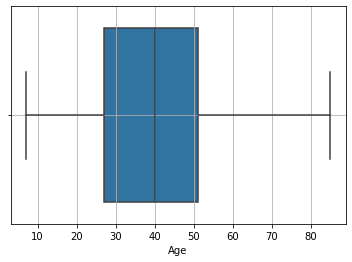

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


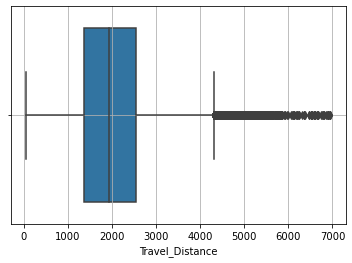

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


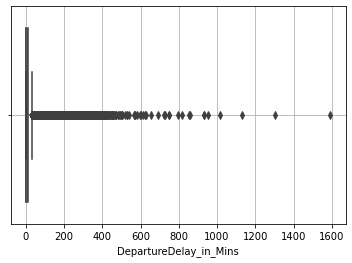

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


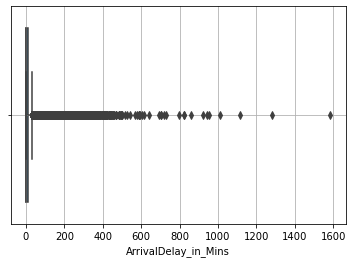

In [1275]:
cols = ['Age','Travel_Distance','DepartureDelay_in_Mins','ArrivalDelay_in_Mins']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

In [1276]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [1277]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [82]:
#cols = ['Age','Travel_Distance','DepartureDelay_in_Mins','ArrivalDelay_in_Mins']
#for i in cols:
#    sns.boxplot(df[i],whis=1.5)
#    plt.grid()
#    plt.show();

In [1221]:
median1=df['Age'].median()
df['Age']=df['Age'].fillna(median1)
df_test.loc[df_test['Age'].isnull() == True,'Age'] = df_test['Age'].median()
display("Train",median1)
display("Test",df_test['Age'].median())

'Train'

40.0

'Test'

40.0

In [1222]:
median2=df['DepartureDelay_in_Mins'].median()
df['DepartureDelay_in_Mins']=df['DepartureDelay_in_Mins'].fillna(median2)
df_test.loc[df_test['DepartureDelay_in_Mins'].isnull() == True,'DepartureDelay_in_Mins'] = df_test['DepartureDelay_in_Mins'].median()
display("Train",median2)
display("Test",df_test['DepartureDelay_in_Mins'].median())

'Train'

0.0

'Test'

0.0

In [1223]:
median3=df['ArrivalDelay_in_Mins'].median()
df['ArrivalDelay_in_Mins']=df['ArrivalDelay_in_Mins'].fillna(median3)
df_test.loc[df_test['ArrivalDelay_in_Mins'].isnull() == True,'ArrivalDelay_in_Mins'] = df_test['ArrivalDelay_in_Mins'].median()
display("Train",median3)
display("Test",df_test['ArrivalDelay_in_Mins'].median())

'Train'

0.0

'Test'

0.0

In [1224]:
display("TRAIN DATASET",df.isnull().sum())
display("TEST DATASET",df_test.isnull().sum())

'TRAIN DATASET'

Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
Gender                       77
CustomerType               8951
Age                           0
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins        0
ArrivalDelay_in_Mins          0
dtype: int64

'TEST DATASET'

Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
Gender                       30
CustomerType               3383
Age                           0
TypeTravel                 3448
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins        0
ArrivalDelay_in_Mins          0
dtype: int64

## Check for any object data types ##

In [937]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print("\n")
print(num)

[]


['ID', 'Overall_Experience', 'Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering', 'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment', 'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']


In [938]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(normalize=True).sort_values())
        print('\n')

**Quick Pivot for some analysis**

In [207]:
#pd.pivot_table(df, index=['Product', 'Gender'],                  
#                     columns=[ 'MaritalStatus'], aggfunc=len) 
#pd.pivot_table(df, index=['Overall_Experience'],                  
#                    columns=[ 'Overall_Experience']) 

In [ ]:
#display(df['Catering'].value_counts(normalize=True).sort_values)
#display(pd.crosstab(df['Overall_Experience'],df['Catering'] ))
#sns.countplot(x="Overall_Experience",hue="Catering",data=df)
#df.hist(by='Overall_Experience',column = 'Catering')

In [ ]:
#plt.figure(figsize=(5,5))
#sns.countplot(x="Overall_Experience",hue="Catering",data=df)

In [13]:
#df.info()

In [939]:
#df['Age']= df['Age'].astype('int64') 
#df['DepartureDelay_in_Mins']= df['DepartureDelay_in_Mins'].astype('int64') 
#df['ArrivalDelay_in_Mins']= df['ArrivalDelay_in_Mins'].astype('int64') 

In [14]:
#df_test['Age']= df_test['Age'].astype('int64') 
#df_test['DepartureDelay_in_Mins']= df_test['DepartureDelay_in_Mins'].astype('int64') 
#df_test['ArrivalDelay_in_Mins']= df_test['ArrivalDelay_in_Mins'].astype('int64') 

## Necessary step for Test file prediction and submission ##

In [22]:
df=df.drop(['ID'],axis=1)

In [23]:
test_file_ids = df_test['ID'] ## necessary step

In [24]:
df_test=df_test.drop(['ID'],axis=1)

In [25]:
df.shape,df_test.shape

((94379, 24), (35602, 23))

## Correlation ##

<AxesSubplot:>

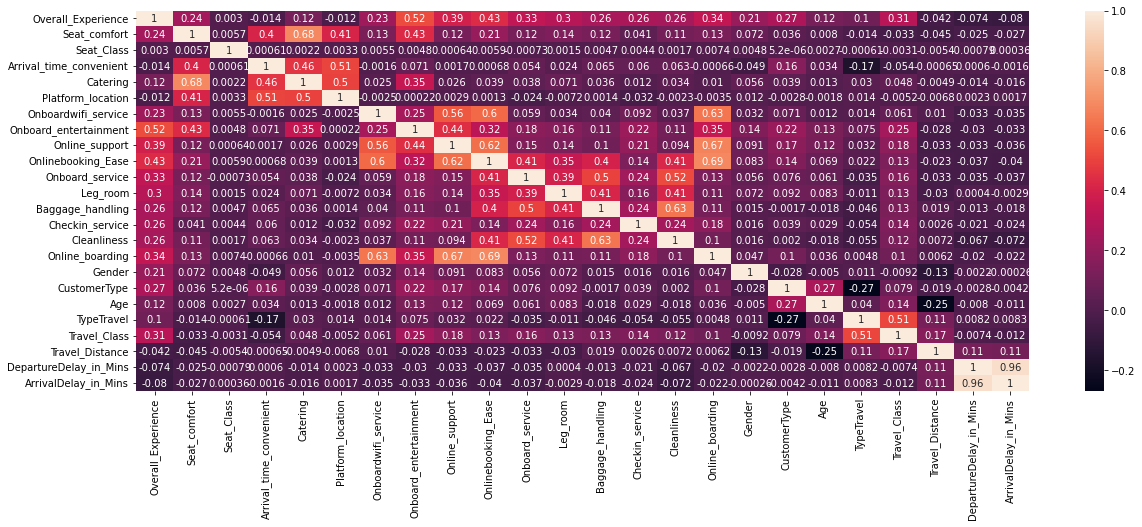

In [99]:
corr=df.corr()
plt.figure(figsize=(20,7))
sns.heatmap(corr,annot=True)

In [ ]:
#sns.pairplot(df)

In [100]:
#from scipy.stats import zscore
df_num_scaled=df.apply(zscore)
df_num_scaled.head()

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,-1.098107,-0.602903,0.994811,1.288950,1.549973,1.536013,0.569615,-1.027150,-0.397449,-1.126732,...,-1.479319,-1.811942,0.985222,0.445082,0.832356,0.625411,1.046703,-1.660469,-0.383916,-0.259227
1,-1.098107,-1.321256,-1.005216,1.288950,-1.356788,-0.757533,0.569615,-1.770047,0.367298,0.405697,...,0.256872,0.499265,-1.014999,0.445082,0.567699,-1.598950,-0.955380,0.215099,-0.147874,-0.389511
2,0.910658,-0.602903,0.994811,-0.735667,-0.630097,-0.757533,-0.946258,0.458644,1.132046,1.171912,...,1.124967,1.269667,0.985222,0.445082,0.236878,0.625411,1.046703,-0.892926,1.635557,2.711265
3,-1.098107,0.115449,-1.005216,-0.735667,0.096593,-0.757533,-0.188322,-1.027150,-0.397449,-0.360518,...,-0.611223,-0.271137,0.985222,0.445082,0.303042,0.625411,1.046703,-1.166284,-0.042966,0.079514
4,0.910658,0.115449,-1.005216,-0.060795,0.096593,0.006983,-0.946258,0.458644,1.132046,0.405697,...,0.256872,0.499265,0.985222,0.445082,0.700027,0.625411,1.046703,0.002054,-0.383916,-0.389511


## Variance Inflation Factor ##

In [101]:
df.columns

Index(['Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins'],
      dtype='object')

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
B = df_num_scaled.drop(['Overall_Experience','DepartureDelay_in_Mins'],axis=1)
vif = pd.DataFrame()
vif["features"]=B.columns
vif["VIF"] = [variance_inflation_factor(B.values, i)
                          for i in range(len(B.columns))]  
print(vif.sort_values(by='VIF'))

                   features       VIF
1                Seat_Class  1.000252
21     ArrivalDelay_in_Mins  1.023309
15                   Gender  1.057783
20          Travel_Distance  1.163112
17                      Age  1.209245
12          Checkin_service  1.216195
16             CustomerType  1.365831
10                 Leg_room  1.392572
2   Arrival_time_convenient  1.625704
4         Platform_location  1.647192
9           Onboard_service  1.665763
18               TypeTravel  1.689714
19             Travel_Class  1.709056
6     Onboard_entertainment  1.893667
11         Baggage_handling  1.930431
13              Cleanliness  2.040062
5       Onboardwifi_service  2.043840
0              Seat_comfort  2.320029
3                  Catering  2.346398
7            Online_support  2.353442
14          Online_boarding  2.717137
8        Onlinebooking_Ease  3.797826


In [ ]:
corr=B.corr()
plt.figure(figsize=(20,7))
sns.heatmap(corr,annot=True)

## Model Building ##

In [945]:
df.columns

Index(['Overall_Experience', 'Seat_comfort', 'Seat_Class',
       'Arrival_time_convenient', 'Catering', 'Platform_location',
       'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
       'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Travel_Class', 'Travel_Distance',
       'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins'],
      dtype='object')

In [26]:
# Copy all the predictor variables into X dataframe
X = df.drop(['Overall_Experience'],axis=1) 
# Copy target into the y dataframe. 
y = df[['Overall_Experience']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['Overall_Experience']) 

In [1284]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler() 
#X_train = sc.fit_transform(X_train) 
#X_test = sc.transform (X_test)

In [1285]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler() 
#X = sc.fit_transform(X) 
#df_test = sc.transform (df_test)

In [1286]:
#X

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((66065, 23), (66065, 1), (28314, 23), (28314, 1))

In [1046]:
#X_train

In [847]:
#corr=X.corr()
#plt.figure(figsize=(20,7))
#sns.heatmap(corr,annot=True)

In [ ]:
cb = CatBoostClassifier(iterations=140, depth=14, learning_rate=0.04) - .95002
cb = CatBoostClassifier(iterations=600, depth=14, learning_rate=0.04) - .9528
cb = CatBoostClassifier( learning_rate=0.04) - .9544

In [ ]:
#999:	learn: 0.0773031	total: 2m 46s	remaining: 0us

In [29]:
#random_state=1
#n_estimators=500
#class_weight={0:0.45, 1:0.55}
#rf= RandomForestClassifier()
#xgb = XGBClassifier() 
cb = CatBoostClassifier(iterations=1200, depth = 10,learning_rate=0.06)
#dt = DecisionTreeClassifier(random_state=1)
#dt_bg = BaggingClassifier(base_estimator=dt,n_estimators=100,random_state=1)
#lgb = LGBMClassifier()
#gb = GradientBoostingClassifier(random_state=1)
#mlp = MLPClassifier()
#nb = GaussianNB()
#knn = KNeighborsClassifier()
#ab = AdaBoostClassifier(n_estimators=100,random_state=1)
#log = LogisticRegression()
#lda = LinearDiscriminantAnalysis() 
models=[cb]
#models=[xgb,cb,lgb]
#models=[rf,xgb,cb,dt_bg,lgb,mlp]
#models=[rf,xgb,cb,dt,dt_bg,lgb,mlp,nb,knn,ab,gb,log,lda]
scores_train=[]
scores_test=[]

In [30]:
for i in models:
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))

0:	learn: 0.6048982	total: 457ms	remaining: 9m 8s
1:	learn: 0.5310511	total: 569ms	remaining: 5m 40s
2:	learn: 0.4735620	total: 710ms	remaining: 4m 43s
3:	learn: 0.4279339	total: 866ms	remaining: 4m 18s
4:	learn: 0.3935418	total: 991ms	remaining: 3m 56s
5:	learn: 0.3666765	total: 1.13s	remaining: 3m 44s
6:	learn: 0.3394307	total: 1.28s	remaining: 3m 38s
7:	learn: 0.3176176	total: 1.43s	remaining: 3m 32s
8:	learn: 0.2955641	total: 1.58s	remaining: 3m 29s
9:	learn: 0.2820172	total: 1.7s	remaining: 3m 21s
10:	learn: 0.2703977	total: 1.81s	remaining: 3m 15s
11:	learn: 0.2577109	total: 1.95s	remaining: 3m 12s
12:	learn: 0.2454461	total: 2.11s	remaining: 3m 13s
13:	learn: 0.2363359	total: 2.26s	remaining: 3m 11s
14:	learn: 0.2264181	total: 2.44s	remaining: 3m 13s
15:	learn: 0.2192018	total: 2.58s	remaining: 3m 11s
16:	learn: 0.2115647	total: 2.71s	remaining: 3m 8s
17:	learn: 0.2069292	total: 2.83s	remaining: 3m 5s
18:	learn: 0.2016109	total: 2.99s	remaining: 3m 5s
19:	learn: 0.1980293	total:

158:	learn: 0.0856363	total: 24.2s	remaining: 2m 38s
159:	learn: 0.0854854	total: 24.3s	remaining: 2m 38s
160:	learn: 0.0852214	total: 24.5s	remaining: 2m 38s
161:	learn: 0.0848821	total: 24.7s	remaining: 2m 38s
162:	learn: 0.0846858	total: 24.9s	remaining: 2m 38s
163:	learn: 0.0845108	total: 25s	remaining: 2m 38s
164:	learn: 0.0841774	total: 25.4s	remaining: 2m 39s
165:	learn: 0.0839314	total: 25.5s	remaining: 2m 38s
166:	learn: 0.0836752	total: 25.7s	remaining: 2m 39s
167:	learn: 0.0834990	total: 26s	remaining: 2m 39s
168:	learn: 0.0832809	total: 26.2s	remaining: 2m 39s
169:	learn: 0.0830516	total: 26.3s	remaining: 2m 39s
170:	learn: 0.0828714	total: 26.5s	remaining: 2m 39s
171:	learn: 0.0826294	total: 26.6s	remaining: 2m 39s
172:	learn: 0.0824769	total: 26.8s	remaining: 2m 38s
173:	learn: 0.0822883	total: 27s	remaining: 2m 39s
174:	learn: 0.0821385	total: 27.2s	remaining: 2m 39s
175:	learn: 0.0818220	total: 27.3s	remaining: 2m 38s
176:	learn: 0.0814306	total: 27.4s	remaining: 2m 38s

315:	learn: 0.0587341	total: 49.2s	remaining: 2m 17s
316:	learn: 0.0586472	total: 49.4s	remaining: 2m 17s
317:	learn: 0.0583826	total: 49.6s	remaining: 2m 17s
318:	learn: 0.0582884	total: 49.8s	remaining: 2m 17s
319:	learn: 0.0581815	total: 49.9s	remaining: 2m 17s
320:	learn: 0.0580022	total: 50.1s	remaining: 2m 17s
321:	learn: 0.0578674	total: 50.3s	remaining: 2m 17s
322:	learn: 0.0578151	total: 50.5s	remaining: 2m 17s
323:	learn: 0.0576785	total: 50.6s	remaining: 2m 16s
324:	learn: 0.0574938	total: 50.8s	remaining: 2m 16s
325:	learn: 0.0574473	total: 50.9s	remaining: 2m 16s
326:	learn: 0.0573005	total: 51s	remaining: 2m 16s
327:	learn: 0.0572155	total: 51.1s	remaining: 2m 15s
328:	learn: 0.0570628	total: 51.3s	remaining: 2m 15s
329:	learn: 0.0569949	total: 51.4s	remaining: 2m 15s
330:	learn: 0.0568480	total: 51.5s	remaining: 2m 15s
331:	learn: 0.0566243	total: 51.7s	remaining: 2m 15s
332:	learn: 0.0565810	total: 51.8s	remaining: 2m 14s
333:	learn: 0.0564800	total: 51.9s	remaining: 2m

472:	learn: 0.0431837	total: 1m 10s	remaining: 1m 49s
473:	learn: 0.0431603	total: 1m 11s	remaining: 1m 48s
474:	learn: 0.0431210	total: 1m 11s	remaining: 1m 48s
475:	learn: 0.0430425	total: 1m 11s	remaining: 1m 48s
476:	learn: 0.0429015	total: 1m 11s	remaining: 1m 48s
477:	learn: 0.0428127	total: 1m 11s	remaining: 1m 48s
478:	learn: 0.0427248	total: 1m 11s	remaining: 1m 48s
479:	learn: 0.0426565	total: 1m 12s	remaining: 1m 48s
480:	learn: 0.0426133	total: 1m 12s	remaining: 1m 47s
481:	learn: 0.0425110	total: 1m 12s	remaining: 1m 47s
482:	learn: 0.0424358	total: 1m 12s	remaining: 1m 47s
483:	learn: 0.0423825	total: 1m 12s	remaining: 1m 47s
484:	learn: 0.0423381	total: 1m 12s	remaining: 1m 47s
485:	learn: 0.0422930	total: 1m 12s	remaining: 1m 47s
486:	learn: 0.0422543	total: 1m 13s	remaining: 1m 46s
487:	learn: 0.0422018	total: 1m 13s	remaining: 1m 46s
488:	learn: 0.0421358	total: 1m 13s	remaining: 1m 46s
489:	learn: 0.0420876	total: 1m 13s	remaining: 1m 46s
490:	learn: 0.0420513	total:

625:	learn: 0.0336863	total: 1m 31s	remaining: 1m 24s
626:	learn: 0.0336302	total: 1m 32s	remaining: 1m 24s
627:	learn: 0.0336066	total: 1m 32s	remaining: 1m 24s
628:	learn: 0.0335629	total: 1m 32s	remaining: 1m 23s
629:	learn: 0.0335382	total: 1m 32s	remaining: 1m 23s
630:	learn: 0.0334997	total: 1m 32s	remaining: 1m 23s
631:	learn: 0.0334517	total: 1m 32s	remaining: 1m 23s
632:	learn: 0.0334035	total: 1m 32s	remaining: 1m 23s
633:	learn: 0.0333775	total: 1m 33s	remaining: 1m 23s
634:	learn: 0.0333483	total: 1m 33s	remaining: 1m 22s
635:	learn: 0.0333204	total: 1m 33s	remaining: 1m 22s
636:	learn: 0.0332991	total: 1m 33s	remaining: 1m 22s
637:	learn: 0.0332483	total: 1m 33s	remaining: 1m 22s
638:	learn: 0.0332034	total: 1m 33s	remaining: 1m 22s
639:	learn: 0.0331708	total: 1m 33s	remaining: 1m 22s
640:	learn: 0.0331358	total: 1m 34s	remaining: 1m 22s
641:	learn: 0.0331017	total: 1m 34s	remaining: 1m 21s
642:	learn: 0.0330599	total: 1m 34s	remaining: 1m 21s
643:	learn: 0.0329862	total:

778:	learn: 0.0269779	total: 1m 54s	remaining: 1m 1s
779:	learn: 0.0269013	total: 1m 54s	remaining: 1m 1s
780:	learn: 0.0268653	total: 1m 54s	remaining: 1m 1s
781:	learn: 0.0268298	total: 1m 54s	remaining: 1m 1s
782:	learn: 0.0267533	total: 1m 54s	remaining: 1m
783:	learn: 0.0266904	total: 1m 54s	remaining: 1m
784:	learn: 0.0266428	total: 1m 54s	remaining: 1m
785:	learn: 0.0265740	total: 1m 54s	remaining: 1m
786:	learn: 0.0265409	total: 1m 55s	remaining: 1m
787:	learn: 0.0264847	total: 1m 55s	remaining: 1m
788:	learn: 0.0264438	total: 1m 55s	remaining: 1m
789:	learn: 0.0264292	total: 1m 55s	remaining: 59.9s
790:	learn: 0.0264049	total: 1m 55s	remaining: 59.7s
791:	learn: 0.0263178	total: 1m 55s	remaining: 59.5s
792:	learn: 0.0262415	total: 1m 55s	remaining: 59.4s
793:	learn: 0.0262137	total: 1m 55s	remaining: 59.2s
794:	learn: 0.0261592	total: 1m 55s	remaining: 59.1s
795:	learn: 0.0261328	total: 1m 56s	remaining: 58.9s
796:	learn: 0.0260815	total: 1m 56s	remaining: 58.7s
797:	learn: 0.

936:	learn: 0.0208593	total: 2m 16s	remaining: 38.2s
937:	learn: 0.0208019	total: 2m 16s	remaining: 38.1s
938:	learn: 0.0207562	total: 2m 16s	remaining: 37.9s
939:	learn: 0.0207326	total: 2m 16s	remaining: 37.8s
940:	learn: 0.0207138	total: 2m 16s	remaining: 37.6s
941:	learn: 0.0206737	total: 2m 16s	remaining: 37.5s
942:	learn: 0.0206402	total: 2m 17s	remaining: 37.3s
943:	learn: 0.0206026	total: 2m 17s	remaining: 37.2s
944:	learn: 0.0205920	total: 2m 17s	remaining: 37.1s
945:	learn: 0.0205595	total: 2m 17s	remaining: 36.9s
946:	learn: 0.0205462	total: 2m 17s	remaining: 36.8s
947:	learn: 0.0205236	total: 2m 17s	remaining: 36.6s
948:	learn: 0.0205067	total: 2m 17s	remaining: 36.5s
949:	learn: 0.0204854	total: 2m 18s	remaining: 36.3s
950:	learn: 0.0204644	total: 2m 18s	remaining: 36.2s
951:	learn: 0.0204165	total: 2m 18s	remaining: 36s
952:	learn: 0.0203729	total: 2m 18s	remaining: 35.9s
953:	learn: 0.0203420	total: 2m 18s	remaining: 35.8s
954:	learn: 0.0203084	total: 2m 18s	remaining: 3

1090:	learn: 0.0169790	total: 2m 37s	remaining: 15.7s
1091:	learn: 0.0169614	total: 2m 37s	remaining: 15.6s
1092:	learn: 0.0169480	total: 2m 37s	remaining: 15.4s
1093:	learn: 0.0169323	total: 2m 37s	remaining: 15.3s
1094:	learn: 0.0169193	total: 2m 37s	remaining: 15.1s
1095:	learn: 0.0168920	total: 2m 37s	remaining: 15s
1096:	learn: 0.0168614	total: 2m 37s	remaining: 14.8s
1097:	learn: 0.0168362	total: 2m 38s	remaining: 14.7s
1098:	learn: 0.0168033	total: 2m 38s	remaining: 14.5s
1099:	learn: 0.0167847	total: 2m 38s	remaining: 14.4s
1100:	learn: 0.0167610	total: 2m 38s	remaining: 14.2s
1101:	learn: 0.0167522	total: 2m 38s	remaining: 14.1s
1102:	learn: 0.0167374	total: 2m 38s	remaining: 14s
1103:	learn: 0.0167254	total: 2m 38s	remaining: 13.8s
1104:	learn: 0.0167053	total: 2m 39s	remaining: 13.7s
1105:	learn: 0.0166823	total: 2m 39s	remaining: 13.5s
1106:	learn: 0.0166631	total: 2m 39s	remaining: 13.4s
1107:	learn: 0.0166563	total: 2m 39s	remaining: 13.2s
1108:	learn: 0.0166441	total: 2m

In [32]:
# Categorical variables that impacts Overall Experience
print(pd.DataFrame({'Training Accuracy':scores_train,'Test Accuracy': scores_test},
                  index=['CatBoost']))            

          Training Accuracy  Test Accuracy
CatBoost           0.999743       0.954298


## Performance Metrics ##

In [34]:
# Prediction on the training and test set with cut off 0.5
ytrain_predict = cb.predict(X_train) 
ytest_predict = cb.predict(X_test) 

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065
 



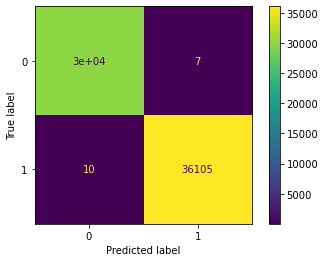

In [35]:
# Confusion matrix on the train data
plot_confusion_matrix(cb,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     12836
           1       0.96      0.95      0.96     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314
 



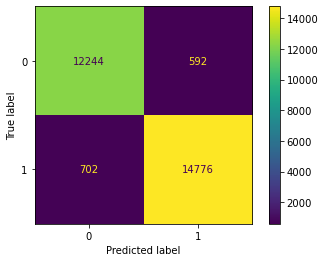

In [36]:
# Confusion matrix on the test data
plot_confusion_matrix(cb,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## Chosen Model for Submission ##

In [1334]:
full_model=CatBoostClassifier(iterations=1200, depth = 10,learning_rate=0.06) 
full_model.fit(X,y)

0:	learn: 0.6049497	total: 550ms	remaining: 10m 59s
1:	learn: 0.5349024	total: 974ms	remaining: 9m 43s
2:	learn: 0.4765135	total: 1.46s	remaining: 9m 42s
3:	learn: 0.4302161	total: 1.96s	remaining: 9m 46s
4:	learn: 0.3956794	total: 2.44s	remaining: 9m 44s
5:	learn: 0.3673583	total: 2.89s	remaining: 9m 34s
6:	learn: 0.3383145	total: 3.34s	remaining: 9m 28s
7:	learn: 0.3168382	total: 3.86s	remaining: 9m 35s
8:	learn: 0.2944946	total: 4.35s	remaining: 9m 36s
9:	learn: 0.2825743	total: 4.84s	remaining: 9m 35s
10:	learn: 0.2677662	total: 5.41s	remaining: 9m 44s
11:	learn: 0.2556197	total: 5.89s	remaining: 9m 42s
12:	learn: 0.2443052	total: 6.4s	remaining: 9m 44s
13:	learn: 0.2340979	total: 6.89s	remaining: 9m 43s
14:	learn: 0.2265303	total: 7.44s	remaining: 9m 47s
15:	learn: 0.2208973	total: 7.92s	remaining: 9m 46s
16:	learn: 0.2145325	total: 8.38s	remaining: 9m 42s
17:	learn: 0.2067372	total: 9s	remaining: 9m 51s
18:	learn: 0.2008084	total: 9.53s	remaining: 9m 52s
19:	learn: 0.1964461	tota

158:	learn: 0.0893486	total: 1m 19s	remaining: 8m 42s
159:	learn: 0.0891363	total: 1m 20s	remaining: 8m 42s
160:	learn: 0.0888179	total: 1m 20s	remaining: 8m 41s
161:	learn: 0.0886002	total: 1m 21s	remaining: 8m 40s
162:	learn: 0.0883867	total: 1m 21s	remaining: 8m 40s
163:	learn: 0.0882306	total: 1m 22s	remaining: 8m 39s
164:	learn: 0.0882183	total: 1m 22s	remaining: 8m 37s
165:	learn: 0.0881041	total: 1m 22s	remaining: 8m 36s
166:	learn: 0.0879245	total: 1m 23s	remaining: 8m 35s
167:	learn: 0.0877327	total: 1m 23s	remaining: 8m 35s
168:	learn: 0.0875425	total: 1m 24s	remaining: 8m 34s
169:	learn: 0.0870889	total: 1m 24s	remaining: 8m 33s
170:	learn: 0.0868938	total: 1m 25s	remaining: 8m 33s
171:	learn: 0.0866046	total: 1m 25s	remaining: 8m 32s
172:	learn: 0.0864561	total: 1m 26s	remaining: 8m 31s
173:	learn: 0.0862755	total: 1m 26s	remaining: 8m 31s
174:	learn: 0.0860498	total: 1m 27s	remaining: 8m 30s
175:	learn: 0.0859392	total: 1m 27s	remaining: 8m 30s
176:	learn: 0.0854998	total:

311:	learn: 0.0646788	total: 2m 30s	remaining: 7m 9s
312:	learn: 0.0645309	total: 2m 31s	remaining: 7m 8s
313:	learn: 0.0644785	total: 2m 31s	remaining: 7m 8s
314:	learn: 0.0643725	total: 2m 32s	remaining: 7m 7s
315:	learn: 0.0642475	total: 2m 32s	remaining: 7m 7s
316:	learn: 0.0641109	total: 2m 33s	remaining: 7m 6s
317:	learn: 0.0639909	total: 2m 33s	remaining: 7m 6s
318:	learn: 0.0638499	total: 2m 34s	remaining: 7m 5s
319:	learn: 0.0637074	total: 2m 34s	remaining: 7m 4s
320:	learn: 0.0636841	total: 2m 35s	remaining: 7m 4s
321:	learn: 0.0635909	total: 2m 35s	remaining: 7m 3s
322:	learn: 0.0634906	total: 2m 35s	remaining: 7m 3s
323:	learn: 0.0633836	total: 2m 36s	remaining: 7m 2s
324:	learn: 0.0633483	total: 2m 36s	remaining: 7m 2s
325:	learn: 0.0632919	total: 2m 37s	remaining: 7m 1s
326:	learn: 0.0632185	total: 2m 37s	remaining: 7m
327:	learn: 0.0631064	total: 2m 38s	remaining: 7m
328:	learn: 0.0629992	total: 2m 38s	remaining: 6m 59s
329:	learn: 0.0628966	total: 2m 38s	remaining: 6m 5

465:	learn: 0.0515812	total: 3m 41s	remaining: 5m 49s
466:	learn: 0.0514302	total: 3m 42s	remaining: 5m 48s
467:	learn: 0.0513781	total: 3m 42s	remaining: 5m 48s
468:	learn: 0.0513017	total: 3m 43s	remaining: 5m 47s
469:	learn: 0.0512719	total: 3m 43s	remaining: 5m 47s
470:	learn: 0.0512126	total: 3m 44s	remaining: 5m 46s
471:	learn: 0.0511583	total: 3m 44s	remaining: 5m 46s
472:	learn: 0.0511028	total: 3m 45s	remaining: 5m 45s
473:	learn: 0.0509835	total: 3m 45s	remaining: 5m 45s
474:	learn: 0.0509130	total: 3m 45s	remaining: 5m 44s
475:	learn: 0.0508770	total: 3m 46s	remaining: 5m 44s
476:	learn: 0.0508076	total: 3m 46s	remaining: 5m 43s
477:	learn: 0.0507099	total: 3m 47s	remaining: 5m 43s
478:	learn: 0.0505121	total: 3m 47s	remaining: 5m 43s
479:	learn: 0.0504433	total: 3m 48s	remaining: 5m 42s
480:	learn: 0.0503885	total: 3m 48s	remaining: 5m 42s
481:	learn: 0.0503373	total: 3m 49s	remaining: 5m 41s
482:	learn: 0.0503048	total: 3m 49s	remaining: 5m 41s
483:	learn: 0.0502449	total:

618:	learn: 0.0420495	total: 4m 57s	remaining: 4m 39s
619:	learn: 0.0419886	total: 4m 58s	remaining: 4m 38s
620:	learn: 0.0419252	total: 4m 58s	remaining: 4m 38s
621:	learn: 0.0418749	total: 4m 59s	remaining: 4m 37s
622:	learn: 0.0417998	total: 4m 59s	remaining: 4m 37s
623:	learn: 0.0417386	total: 4m 59s	remaining: 4m 36s
624:	learn: 0.0417202	total: 5m	remaining: 4m 36s
625:	learn: 0.0416669	total: 5m	remaining: 4m 35s
626:	learn: 0.0415797	total: 5m 1s	remaining: 4m 35s
627:	learn: 0.0415443	total: 5m 1s	remaining: 4m 34s
628:	learn: 0.0415062	total: 5m 2s	remaining: 4m 34s
629:	learn: 0.0414717	total: 5m 2s	remaining: 4m 33s
630:	learn: 0.0414281	total: 5m 3s	remaining: 4m 33s
631:	learn: 0.0413806	total: 5m 3s	remaining: 4m 32s
632:	learn: 0.0413688	total: 5m 3s	remaining: 4m 32s
633:	learn: 0.0413170	total: 5m 4s	remaining: 4m 31s
634:	learn: 0.0412614	total: 5m 4s	remaining: 4m 31s
635:	learn: 0.0411676	total: 5m 5s	remaining: 4m 30s
636:	learn: 0.0411261	total: 5m 5s	remaining: 

772:	learn: 0.0347129	total: 6m 9s	remaining: 3m 23s
773:	learn: 0.0346496	total: 6m 9s	remaining: 3m 23s
774:	learn: 0.0345761	total: 6m 10s	remaining: 3m 22s
775:	learn: 0.0345536	total: 6m 10s	remaining: 3m 22s
776:	learn: 0.0345055	total: 6m 11s	remaining: 3m 22s
777:	learn: 0.0344431	total: 6m 11s	remaining: 3m 21s
778:	learn: 0.0343901	total: 6m 12s	remaining: 3m 21s
779:	learn: 0.0342784	total: 6m 12s	remaining: 3m 20s
780:	learn: 0.0342307	total: 6m 13s	remaining: 3m 20s
781:	learn: 0.0341908	total: 6m 13s	remaining: 3m 19s
782:	learn: 0.0341475	total: 6m 14s	remaining: 3m 19s
783:	learn: 0.0340768	total: 6m 14s	remaining: 3m 18s
784:	learn: 0.0340436	total: 6m 15s	remaining: 3m 18s
785:	learn: 0.0339830	total: 6m 15s	remaining: 3m 18s
786:	learn: 0.0339107	total: 6m 16s	remaining: 3m 17s
787:	learn: 0.0338587	total: 6m 17s	remaining: 3m 17s
788:	learn: 0.0338157	total: 6m 17s	remaining: 3m 16s
789:	learn: 0.0337884	total: 6m 18s	remaining: 3m 16s
790:	learn: 0.0337608	total: 6

925:	learn: 0.0287084	total: 7m 22s	remaining: 2m 10s
926:	learn: 0.0286908	total: 7m 22s	remaining: 2m 10s
927:	learn: 0.0286551	total: 7m 23s	remaining: 2m 9s
928:	learn: 0.0285938	total: 7m 23s	remaining: 2m 9s
929:	learn: 0.0285684	total: 7m 24s	remaining: 2m 8s
930:	learn: 0.0285400	total: 7m 24s	remaining: 2m 8s
931:	learn: 0.0285207	total: 7m 24s	remaining: 2m 7s
932:	learn: 0.0284787	total: 7m 25s	remaining: 2m 7s
933:	learn: 0.0284197	total: 7m 25s	remaining: 2m 6s
934:	learn: 0.0283813	total: 7m 26s	remaining: 2m 6s
935:	learn: 0.0283466	total: 7m 26s	remaining: 2m 6s
936:	learn: 0.0283154	total: 7m 27s	remaining: 2m 5s
937:	learn: 0.0282587	total: 7m 27s	remaining: 2m 5s
938:	learn: 0.0281995	total: 7m 28s	remaining: 2m 4s
939:	learn: 0.0281665	total: 7m 28s	remaining: 2m 4s
940:	learn: 0.0281399	total: 7m 28s	remaining: 2m 3s
941:	learn: 0.0281081	total: 7m 29s	remaining: 2m 3s
942:	learn: 0.0280636	total: 7m 29s	remaining: 2m 2s
943:	learn: 0.0280229	total: 7m 30s	remainin

1078:	learn: 0.0242732	total: 8m 33s	remaining: 57.6s
1079:	learn: 0.0242393	total: 8m 33s	remaining: 57.1s
1080:	learn: 0.0242268	total: 8m 34s	remaining: 56.6s
1081:	learn: 0.0242068	total: 8m 34s	remaining: 56.1s
1082:	learn: 0.0241865	total: 8m 35s	remaining: 55.7s
1083:	learn: 0.0241459	total: 8m 35s	remaining: 55.2s
1084:	learn: 0.0241065	total: 8m 36s	remaining: 54.7s
1085:	learn: 0.0240885	total: 8m 36s	remaining: 54.2s
1086:	learn: 0.0240612	total: 8m 37s	remaining: 53.7s
1087:	learn: 0.0240386	total: 8m 37s	remaining: 53.3s
1088:	learn: 0.0240155	total: 8m 37s	remaining: 52.8s
1089:	learn: 0.0240027	total: 8m 38s	remaining: 52.3s
1090:	learn: 0.0239815	total: 8m 38s	remaining: 51.8s
1091:	learn: 0.0239502	total: 8m 39s	remaining: 51.4s
1092:	learn: 0.0239170	total: 8m 39s	remaining: 50.9s
1093:	learn: 0.0238895	total: 8m 40s	remaining: 50.4s
1094:	learn: 0.0238562	total: 8m 40s	remaining: 49.9s
1095:	learn: 0.0237993	total: 8m 41s	remaining: 49.5s
1096:	learn: 0.0237858	total

In [ ]:
#df_test

In [119]:
#df_test=df_test.drop(['DepartureDelay_in_Mins'],axis=1)

In [1335]:
df_test.shape

(35602, 23)

In [1336]:
final_predictions = full_model.predict(df_test)
final_predictions

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [1337]:
submission=pd.DataFrame([test_file_ids,final_predictions]).T

In [1339]:
submission.rename(columns={"Unnamed 0": "Overall_Experience"},inplace=True)

In [1341]:
submission.to_csv('submission21.csv',index = False)